# 03 BMRA

Run BMRA based on global responses derived from the pathway activity predictions.

In [1]:
import pandas as pd
import numpy as np
import os
import bmra

In [2]:
data_dir_1 = "01_outputs_2020_cgga"
data_dir_2 = "02_outputs_2020_cgga"
info_dir = "/home/jing/Phd_project/project_GBM/gbm_Scripts/gbm_Scripts_bmra_gi1/01_outputs_2020_cgga"
out_dir = "03_outputs_2020_cgga"


os.makedirs(out_dir, exist_ok = True)

## Load data

### Global responses

Assembled from global responses calculated from predicted pathway activities, and DPD global responses.

In [3]:
def assemble_R_global(pathway_rglobal_file, dpd_rglobal_file):
    """
    Assemble full R_global matrix
    """
    R_global_modules_df = pd.read_csv(pathway_rglobal_file, index_col = 0)

    perts = R_global_modules_df.columns.tolist()

    R_global_DPD_df = pd.read_csv(dpd_rglobal_file, index_col=0).T

    # filter by perts list
    R_global_DPD_df = R_global_DPD_df[R_global_DPD_df.index.isin(perts)]

    # sort by perts list
    R_global_DPD_df["sort_col"] = R_global_DPD_df.index.map({val: i for i, val in enumerate(perts)})
    R_global_DPD_df = R_global_DPD_df.sort_values("sort_col")
    R_global_DPD_df = R_global_DPD_df.drop("sort_col", axis = 1)

    # transpose
    R_global_DPD_df = R_global_DPD_df.T

    R_global_df = pd.concat([R_global_modules_df, R_global_DPD_df])

    return R_global_df

In [4]:
R_global_df = assemble_R_global(
    pathway_rglobal_file = os.path.join(data_dir_2, "R_global_annotated.csv"),
    dpd_rglobal_file = os.path.join(data_dir_1, "R_global_DPDonly_annotated.csv"),
)

modules = R_global_df.index.tolist()
exp_ids = R_global_df.columns.tolist()

R_global = R_global_df.values
n_modules = R_global.shape[0]

print(R_global.shape)
display(R_global_df)

(13, 113)


,ASG002_GI1_24H:A10,ASG002_GI1_24H:A11,ASG002_GI1_24H:A12,ASG002_GI1_24H:A19,ASG002_GI1_24H:A20,ASG002_GI1_24H:A21,ASG002_GI1_24H:B10,ASG002_GI1_24H:B11,ASG002_GI1_24H:B12,ASG002_GI1_24H:B13,...,MOAR010_GI1_24H:J05,MOAR010_GI1_24H:J06,MOAR010_GI1_24H:J22,MOAR010_GI1_24H:J23,MOAR010_GI1_24H:J24,MOAR010_GI1_24H:K08,MOAR010_GI1_24H:K09,MOAR011_GI1_24H:F07,MOAR011_GI1_24H:F08,MOAR011_GI1_24H:F09
CDK1,-0.544371,-0.087206,0.004462,0.000518,-0.165852,-0.123559,-0.066629,-0.328041,-0.249057,-0.434975,...,0.010956,0.087670,-0.292189,-0.005659,-0.195304,-0.155539,-0.034474,-0.318297,-0.073063,0.069582
CDK2,0.020559,0.069734,-0.001080,-0.464564,-0.263024,-0.055136,0.072437,-0.162919,0.067859,0.031029,...,-0.087624,0.005824,-0.032115,-0.262482,0.073238,0.042889,-0.120820,0.056216,0.054648,0.078931
CDK4_6,-1.543049,-0.049807,0.140181,-0.192649,-0.519392,-0.166592,-0.083582,-0.324377,-0.247853,-1.677130,...,0.165178,0.038395,0.024132,0.103558,-0.272818,-0.223112,-0.394767,-0.191914,-0.196364,0.186694
PI3K,-1.979693,-1.518231,-1.289773,-1.771270,-1.239607,-0.541818,-0.152679,-0.259405,-0.618668,-0.558668,...,0.144203,-0.325694,-0.181401,-0.156241,-0.413334,-0.141484,-0.242095,-0.738628,-0.334441,0.071863
ERK,-1.078893,-0.448885,-0.343569,-0.624205,-0.340240,-0.669445,-0.446864,-1.013381,-0.572754,-1.057738,...,-0.062186,0.094462,-0.050451,0.114076,0.057355,-0.059771,-0.049921,-0.299192,-0.347548,-0.013148
Hypoxia,-0.254460,0.023244,0.058305,0.041497,-0.035607,-0.038185,0.084657,-0.108965,-0.036370,-0.158137,...,-0.116611,-0.009530,0.055396,-0.090678,-0.062339,-0.037341,0.082524,-0.023150,-0.003951,-0.022878
PDGFR,-0.746225,-0.173243,0.138782,-0.054092,-0.351855,-0.017888,0.019184,-0.604796,0.106266,-0.807978,...,-0.028460,0.116757,0.032017,0.053442,-0.244107,0.142636,-0.081290,-0.757456,-0.249390,0.100890
Aurora,-0.168858,0.164780,0.098579,0.041888,-0.155991,-0.190925,-0.363314,-0.467631,0.028508,-0.865582,...,0.098471,0.134366,0.187442,0.250237,0.002018,0.192449,-0.004437,-0.350023,-0.145069,0.351451
Estrogen,-0.044910,-0.020865,-0.124385,0.018036,0.178990,-0.612208,-0.050410,0.045892,-0.060007,0.123771,...,0.131479,0.173924,0.176119,0.137812,-0.476466,0.210816,-0.401018,-0.387373,0.005512,-0.038999
EGFR,-0.452189,0.037577,0.141512,-0.158725,-0.076023,0.076620,0.091957,-0.570046,0.022335,-1.082178,...,0.267314,-0.586626,-0.527483,-0.057473,-0.229759,-0.325984,-0.390054,0.138293,0.187220,0.258578


In [5]:
print(R_global_df.values.min())
print(R_global_df.values.max())

-26.23696888971179
36.75787314373195


### Perturbation matrix

In [6]:
inhib_conc_df = pd.read_csv(os.path.join(data_dir_1, "inhib_conc_annotated.csv"), index_col = 0)
#LFC_PLCg = pd.read_csv(os.path.join(info_dir,"PLCg_Data_log_2020.csv"),index_col=0)
#inhib_conc = inhib_conc_df.drop(columns=LFC_PLCg.index).values
inhib_conc = inhib_conc_df.values

n_DPDs = R_global.shape[0] - inhib_conc.shape[0]

pert_modules = np.where(inhib_conc != 0, 1, 0)
pert_DPD = np.zeros((n_DPDs, len(exp_ids)))

pert = np.vstack([pert_modules, pert_DPD])

print(pert.shape)
print(pert)

(13, 113)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Networks

In [7]:
# empty prior
#G_prior = np.zeros((n_modules, n_modules))
G_prior_df = pd.read_excel("/home/jing/Phd_project/project_GBM/gbm_OUTPUT/gbm_OUTPUT_LINCS/gbm_STVs.xlsx", sheet_name = "prior_network", index_col = 0)

G_prior = G_prior_df.values
G_prior_df

,CDK1,CDK2,CDK4_6,p53,EGFR,Aurora,Estrogen,PDGFR,Hypoxia,ERK,PI3K,GBM_onc,GBM_survival
CDK1,0,0,0,0,0,0,0,0,0,0,0,0,0
CDK2,0,0,0,0,0,0,0,0,0,0,0,0,0
CDK4_6,0,0,0,0,0,0,0,0,0,0,0,0,0
p53,0,0,0,0,0,0,0,0,0,0,0,0,0
EGFR,0,0,0,0,0,0,0,0,0,0,0,0,0
Aurora,0,0,0,0,0,0,0,0,0,0,0,0,0
Estrogen,0,0,0,0,0,0,0,0,0,0,0,0,0
PDGFR,0,0,0,0,0,0,0,0,0,0,0,0,0
Hypoxia,0,0,0,0,0,0,0,0,0,0,0,0,0
ERK,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
G_prior_df.shape

(13, 13)

In [9]:
#G_prior_r_df = pd.read_excel(os.path.join(info_dir, "ALL_DATA_2020.xlsx"), sheet_name = "prior_r", index_col = 0)

#G_prior_r = G_prior_r_df.values
#G_prior_r_df

In [10]:
G_not = np.eye(n_modules)
G_not[:, n_modules - n_DPDs :] = 1

G_not

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.]])

## Run BMRA

In [11]:
n_gibbs = 200_000
n_window = 5_000

mode = "all"
n_iterations = 1

In [12]:
G_prior

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [13]:
A_mean, A_sd, r_mean, r_sd = bmra.run_bmra(R_global,
            pert,
            G_prior,
            G_not,
            #r_prior = G_prior_r,
            n_gibbs = n_gibbs,
            n_window = n_window,
            mode = mode,
            n_iterations = n_iterations,
        )

A_mean_df = pd.DataFrame(A_mean, index = modules, columns = modules)
A_sd_df = pd.DataFrame(A_sd, index = modules, columns = modules)
r_mean_df = pd.DataFrame(r_mean, index = modules, columns = modules)
r_sd_df = pd.DataFrame(r_sd, index = modules, columns = modules)

display(A_mean_df)
display(A_sd_df)
display(r_mean_df)
display(r_sd_df)

A_mean_df.to_csv(os.path.join(out_dir, "A_mean.csv"))
A_sd_df.to_csv(os.path.join(out_dir, "A_sd.csv"))
r_mean_df.to_csv(os.path.join(out_dir, "r_mean.csv"))
r_sd_df.to_csv(os.path.join(out_dir, "r_sd.csv"))

,CDK1,CDK2,CDK4_6,PI3K,ERK,Hypoxia,PDGFR,Aurora,Estrogen,EGFR,p53,GBM_onc,GBM_survival
CDK1,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000569,0.0,0.0
CDK2,1.000000,0.000000,0.000000,0.001078,1.000000,0.027957,0.767149,0.000000,0.001999,0.000000,0.002251,0.0,0.0
CDK4_6,1.000000,0.006095,0.000000,1.000000,0.059830,0.000138,0.978044,0.006713,0.000111,1.000000,0.602511,0.0,0.0
PI3K,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.195594,0.470533,0.0,0.0
ERK,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000658,1.000000,0.0,0.0
Hypoxia,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
PDGFR,0.000000,1.000000,1.000000,0.000000,0.046275,0.000000,0.000000,1.000000,0.000000,0.041946,0.003723,0.0,0.0
Aurora,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0
Estrogen,0.967154,0.004436,0.043947,0.001495,0.010514,0.002163,1.000000,0.008465,0.000000,0.005131,0.899725,0.0,0.0
EGFR,0.000000,0.000000,1.000000,0.000000,0.000000,0.055608,1.000000,0.001605,0.000000,0.000000,0.000000,0.0,0.0


,CDK1,CDK2,CDK4_6,PI3K,ERK,Hypoxia,PDGFR,Aurora,Estrogen,EGFR,p53,GBM_onc,GBM_survival
CDK1,0.000000e+00,1.110223e-16,1.110223e-16,1.110223e-16,1.110223e-16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.384333e-02,0.0,0.0
CDK2,2.886580e-15,0.000000e+00,0.000000e+00,3.281414e-02,2.886580e-15,1.648498e-01,4.226478e-01,0.000000e+00,4.466747e-02,0.000000e+00,4.739608e-02,0.0,0.0
CDK4_6,1.998401e-15,7.783424e-02,0.000000e+00,1.998401e-15,2.371716e-01,1.175925e-02,1.465405e-01,8.165893e-02,1.054711e-02,1.998401e-15,4.893786e-01,0.0,0.0
PI3K,0.000000e+00,5.551115e-16,5.551115e-16,0.000000e+00,5.551115e-16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.966576e-01,4.991309e-01,0.0,0.0
ERK,2.220446e-16,0.000000e+00,0.000000e+00,2.220446e-16,0.000000e+00,0.000000e+00,2.220446e-16,2.220446e-16,0.000000e+00,2.564411e-02,2.220446e-16,0.0,0.0
Hypoxia,0.000000e+00,0.000000e+00,0.000000e+00,1.998401e-15,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
PDGFR,0.000000e+00,2.664535e-15,2.664535e-15,0.000000e+00,2.100805e-01,0.000000e+00,0.000000e+00,2.664535e-15,0.000000e+00,2.004657e-01,6.090049e-02,0.0,0.0
Aurora,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.776357e-15,0.000000e+00,1.776357e-15,0.000000e+00,0.000000e+00,1.776357e-15,0.000000e+00,0.0,0.0
Estrogen,1.782327e-01,6.645740e-02,2.049780e-01,3.863790e-02,1.019984e-01,4.645827e-02,1.110223e-15,9.161524e-02,0.000000e+00,7.144993e-02,3.003659e-01,0.0,0.0
EGFR,0.000000e+00,0.000000e+00,2.442491e-15,0.000000e+00,0.000000e+00,2.291639e-01,2.442491e-15,4.002729e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0


,CDK1,CDK2,CDK4_6,PI3K,ERK,Hypoxia,PDGFR,Aurora,Estrogen,EGFR,p53,GBM_onc,GBM_survival
CDK1,0.000000,0.327033,0.232437,0.116146,0.104551,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-0.000009,0.0,0.0
CDK2,0.380662,0.000000,0.000000,0.000059,-0.128075,2.165024e-03,0.098630,0.000000,-0.000122,0.000000,-0.000040,0.0,0.0
CDK4_6,0.504204,-0.001362,0.000000,0.188599,0.006419,9.545394e-08,0.230537,0.000494,-0.000011,0.141086,-0.063524,0.0,0.0
PI3K,0.000000,0.515489,0.266876,0.000000,0.178956,0.000000e+00,0.000000,0.000000,0.000000,0.013803,0.034826,0.0,0.0
ERK,0.312318,0.000000,0.000000,0.196511,0.000000,0.000000e+00,0.292170,0.319759,0.000000,0.000038,0.163526,0.0,0.0
Hypoxia,0.000000,0.000000,0.000000,0.176867,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
PDGFR,0.000000,0.294552,0.365561,0.000000,0.004237,0.000000e+00,0.000000,0.202688,0.000000,0.003502,-0.000268,0.0,0.0
Aurora,0.000000,0.000000,0.000000,0.000000,0.245834,0.000000e+00,0.293755,0.000000,0.000000,0.227789,0.000000,0.0,0.0
Estrogen,-0.247607,-0.000727,-0.006860,-0.000042,-0.000628,-6.350849e-05,0.231143,0.000431,0.000000,-0.000193,0.090608,0.0,0.0
EGFR,0.000000,0.000000,0.364539,0.000000,0.000000,1.003673e-02,0.347431,0.000260,0.000000,0.000000,0.000000,0.0,0.0


,CDK1,CDK2,CDK4_6,PI3K,ERK,Hypoxia,PDGFR,Aurora,Estrogen,EGFR,p53,GBM_onc,GBM_survival
CDK1,0.000000,0.063886,0.028300,0.027648,0.021010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000407,0.0,0.0
CDK2,0.038826,0.000000,0.000000,0.001826,0.026802,0.013235,0.062088,0.000000,0.002833,0.000000,0.001016,0.0,0.0
CDK4_6,0.062775,0.018216,0.000000,0.046157,0.027513,0.000008,0.060873,0.006615,0.001088,0.033989,0.057608,0.0,0.0
PI3K,0.000000,0.039236,0.034717,0.000000,0.022779,0.000000,0.000000,0.000000,0.000000,0.029111,0.039445,0.0,0.0
ERK,0.066629,0.000000,0.000000,0.047513,0.000000,0.000000,0.054076,0.040253,0.000000,0.001497,0.033576,0.0,0.0
Hypoxia,0.000000,0.000000,0.000000,0.001507,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
PDGFR,0.000000,0.042790,0.026408,0.000000,0.019765,0.000000,0.000000,0.022276,0.000000,0.017224,0.004516,0.0,0.0
Aurora,0.000000,0.000000,0.000000,0.000000,0.019776,0.000000,0.030803,0.000000,0.000000,0.020529,0.000000,0.0,0.0
Estrogen,0.065778,0.011605,0.033768,0.001470,0.007030,0.001843,0.039329,0.005459,0.000000,0.003369,0.040108,0.0,0.0
EGFR,0.000000,0.000000,0.017765,0.000000,0.000000,0.041755,0.020896,0.006496,0.000000,0.000000,0.000000,0.0,0.0


In [14]:
np.fill_diagonal(r_mean_df.values,-1)
rm_minus_inv = pd.DataFrame(np.linalg.pinv(r_mean_df),index=r_mean_df.index,columns=r_mean_df.columns)*(-1)
rm_minus_inv.to_csv(os.path.join(out_dir, 'r_minv.csv'))
display(rm_minus_inv)

,CDK1,CDK2,CDK4_6,PI3K,ERK,Hypoxia,PDGFR,Aurora,Estrogen,EGFR,p53,GBM_onc,GBM_survival
CDK1,1.731136,0.865226,0.688437,0.364758,0.174066,0.003216,0.380223,0.133100,-0.001212,0.133821,-0.002827,-1.641883e-15,-1.360236e-16
CDK2,0.593634,1.291682,0.248948,0.090570,-0.084103,0.003188,0.173779,0.008458,-0.010847,0.038907,-0.027499,-5.569604e-17,-2.345874e-16
CDK4_6,1.356771,0.927254,1.865910,0.520186,0.178801,0.005226,0.739818,0.208118,-0.028909,0.320444,-0.074042,-5.296839e-16,9.186133e-17
PI3K,0.877173,1.096960,0.772347,1.307034,0.235713,0.004055,0.466456,0.170347,0.013879,0.167452,0.036082,-4.456163e-16,-2.700196e-16
ERK,1.145395,0.955217,0.799691,0.597067,1.268602,0.004671,0.930205,0.594682,0.071224,0.259820,0.183599,-2.310345e-16,1.432673e-17
Hypoxia,0.155143,0.194016,0.136603,0.231172,0.041690,1.000717,0.082501,0.030129,0.002455,0.029617,0.006382,-2.589604e-16,2.725575e-17
PDGFR,0.820481,0.853490,0.901876,0.280083,0.121769,0.004003,1.500603,0.343587,-0.011424,0.214635,-0.029103,-3.433048e-16,5.185543e-17
Aurora,0.700590,0.630565,0.688191,0.294962,0.372237,0.005363,0.849916,1.291742,0.010855,0.398398,0.028151,-2.312382e-16,-1.062352e-16
Estrogen,-0.266754,-0.014569,-0.003507,-0.001803,-0.009414,0.000015,0.252408,0.048598,1.035917,0.011234,0.092418,2.196177e-16,2.310835e-16
EGFR,0.781396,0.636661,0.995087,0.289335,0.108002,0.013341,0.792098,0.195878,-0.014480,1.191786,-0.037031,1.547212e-16,-2.037548e-16


In [15]:
con_mat = pd.DataFrame(columns=['From','To','Strength'])
for con_to in r_mean_df.index:
    for con_from in r_mean_df.columns:
        if ((r_mean_df.loc[con_to,con_from] != 0) & (con_from != con_to)):
            row_df = pd.DataFrame([[con_from,con_to,r_mean_df.loc[con_to,con_from]]],columns=['From','To','Strength'])
            if con_mat.empty:
                con_mat = row_df.copy()
            else:
                con_mat = pd.concat([con_mat,row_df],axis=0,ignore_index=True)
            #con_mat = con_mat.append({'From':con_from,'To':con_to,'Strength':r_mean_df.loc[con_to,con_from]},ignore_index=True)
con_mat.to_csv(os.path.join(out_dir, 'r_net.txt'),sep='\t',index=False)
display(con_mat)

,From,To,Strength
0,CDK2,CDK1,0.327033
1,CDK4_6,CDK1,0.232437
2,PI3K,CDK1,0.116146
3,ERK,CDK1,0.104551
4,p53,CDK1,-0.000009
...,...,...,...
64,Hypoxia,GBM_onc,-0.285775
65,PDGFR,GBM_onc,-0.287405
66,Aurora,GBM_onc,-0.040879
67,p53,GBM_onc,0.003469


In [16]:
# now the same but with filtered matrices
# threshold value
Athr = 0.5

rm_filt = r_mean_df[np.abs(A_mean_df) > Athr].fillna(0).copy()
np.fill_diagonal(rm_filt.values,-1)
rm_filt.to_csv(os.path.join(out_dir, 'r_mean_filt.csv'))
display(rm_filt)

rm_filt_minus_inv = pd.DataFrame(np.linalg.pinv(rm_filt),index=rm_filt.index,columns=rm_filt.columns)*(-1)
rm_filt_minus_inv.to_csv(os.path.join(out_dir, 'r_minv_filt.csv'))
display(rm_minus_inv)

con_mat = pd.DataFrame(columns=['From','To','Strength'])
for con_to in rm_filt.index:
    for con_from in rm_filt.columns:
        if ((rm_filt.loc[con_to,con_from] != 0) & (con_from != con_to)):
            row_df = pd.DataFrame([[con_from,con_to,rm_filt.loc[con_to,con_from]]],columns=['From','To','Strength'])
            if con_mat.empty:
                con_mat = row_df.copy()
            else:
                con_mat = pd.concat([con_mat,row_df],axis=0,ignore_index=True)
            #con_mat = con_mat.append({'From':con_from,'To':con_to,'Strength':r_mean_df.loc[con_to,con_from]},ignore_index=True)
con_mat.to_csv(os.path.join(out_dir, 'r_net_filt.txt'),sep='\t',index=False)
#display(con_mat)


,CDK1,CDK2,CDK4_6,PI3K,ERK,Hypoxia,PDGFR,Aurora,Estrogen,EGFR,p53,GBM_onc,GBM_survival
CDK1,-1.000000,0.327033,0.232437,0.116146,0.104551,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0
CDK2,0.380662,-1.000000,0.000000,0.000000,-0.128075,0.000000,0.098630,0.000000,0.00000,0.000000,0.000000,0.0,0.0
CDK4_6,0.504204,0.000000,-1.000000,0.188599,0.000000,0.000000,0.230537,0.000000,0.00000,0.141086,-0.063524,0.0,0.0
PI3K,0.000000,0.515489,0.266876,-1.000000,0.178956,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0
ERK,0.312318,0.000000,0.000000,0.196511,-1.000000,0.000000,0.292170,0.319759,0.00000,0.000000,0.163526,0.0,0.0
Hypoxia,0.000000,0.000000,0.000000,0.176867,0.000000,-1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0
PDGFR,0.000000,0.294552,0.365561,0.000000,0.000000,0.000000,-1.000000,0.202688,0.00000,0.000000,0.000000,0.0,0.0
Aurora,0.000000,0.000000,0.000000,0.000000,0.245834,0.000000,0.293755,-1.000000,0.00000,0.227789,0.000000,0.0,0.0
Estrogen,-0.247607,0.000000,0.000000,0.000000,0.000000,0.000000,0.231143,0.000000,-1.00000,0.000000,0.090608,0.0,0.0
EGFR,0.000000,0.000000,0.364539,0.000000,0.000000,0.000000,0.347431,0.000000,0.00000,-1.000000,0.000000,0.0,0.0


,CDK1,CDK2,CDK4_6,PI3K,ERK,Hypoxia,PDGFR,Aurora,Estrogen,EGFR,p53,GBM_onc,GBM_survival
CDK1,1.731136,0.865226,0.688437,0.364758,0.174066,0.003216,0.380223,0.133100,-0.001212,0.133821,-0.002827,-1.641883e-15,-1.360236e-16
CDK2,0.593634,1.291682,0.248948,0.090570,-0.084103,0.003188,0.173779,0.008458,-0.010847,0.038907,-0.027499,-5.569604e-17,-2.345874e-16
CDK4_6,1.356771,0.927254,1.865910,0.520186,0.178801,0.005226,0.739818,0.208118,-0.028909,0.320444,-0.074042,-5.296839e-16,9.186133e-17
PI3K,0.877173,1.096960,0.772347,1.307034,0.235713,0.004055,0.466456,0.170347,0.013879,0.167452,0.036082,-4.456163e-16,-2.700196e-16
ERK,1.145395,0.955217,0.799691,0.597067,1.268602,0.004671,0.930205,0.594682,0.071224,0.259820,0.183599,-2.310345e-16,1.432673e-17
Hypoxia,0.155143,0.194016,0.136603,0.231172,0.041690,1.000717,0.082501,0.030129,0.002455,0.029617,0.006382,-2.589604e-16,2.725575e-17
PDGFR,0.820481,0.853490,0.901876,0.280083,0.121769,0.004003,1.500603,0.343587,-0.011424,0.214635,-0.029103,-3.433048e-16,5.185543e-17
Aurora,0.700590,0.630565,0.688191,0.294962,0.372237,0.005363,0.849916,1.291742,0.010855,0.398398,0.028151,-2.312382e-16,-1.062352e-16
Estrogen,-0.266754,-0.014569,-0.003507,-0.001803,-0.009414,0.000015,0.252408,0.048598,1.035917,0.011234,0.092418,2.196177e-16,2.310835e-16
EGFR,0.781396,0.636661,0.995087,0.289335,0.108002,0.013341,0.792098,0.195878,-0.014480,1.191786,-0.037031,1.547212e-16,-2.037548e-16


In [17]:
# number of zero elements in the matrix
display(len(rm_filt.index)*len(rm_filt.columns) - rm_filt.astype(bool).sum().sum())

116

In [18]:
# number of non-zero elements in the matrix
display(rm_filt.astype(bool).sum().sum() - len(modules))

40

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
rm_minus_inv=pd.read_csv(os.path.join(out_dir, 'r_minv.csv'),index_col=0)
display(rm_minus_inv)

,CDK1,CDK2,CDK4_6,PI3K,ERK,Hypoxia,PDGFR,Aurora,Estrogen,EGFR,p53,GBM_onc,GBM_survival
CDK1,1.731136,0.865226,0.688437,0.364758,0.174066,0.003216,0.380223,0.133100,-0.001212,0.133821,-0.002827,-1.641883e-15,-1.360236e-16
CDK2,0.593634,1.291682,0.248948,0.090570,-0.084103,0.003188,0.173779,0.008458,-0.010847,0.038907,-0.027499,-5.569604e-17,-2.345874e-16
CDK4_6,1.356771,0.927254,1.865910,0.520186,0.178801,0.005226,0.739818,0.208118,-0.028909,0.320444,-0.074042,-5.296839e-16,9.186133e-17
PI3K,0.877173,1.096960,0.772347,1.307034,0.235713,0.004055,0.466456,0.170347,0.013879,0.167452,0.036082,-4.456163e-16,-2.700196e-16
ERK,1.145395,0.955217,0.799691,0.597067,1.268602,0.004671,0.930205,0.594682,0.071224,0.259820,0.183599,-2.310345e-16,1.432673e-17
Hypoxia,0.155143,0.194016,0.136603,0.231172,0.041690,1.000717,0.082501,0.030129,0.002455,0.029617,0.006382,-2.589604e-16,2.725575e-17
PDGFR,0.820481,0.853490,0.901876,0.280083,0.121769,0.004003,1.500603,0.343587,-0.011424,0.214635,-0.029103,-3.433048e-16,5.185543e-17
Aurora,0.700590,0.630565,0.688191,0.294962,0.372237,0.005363,0.849916,1.291742,0.010855,0.398398,0.028151,-2.312382e-16,-1.062352e-16
Estrogen,-0.266754,-0.014569,-0.003507,-0.001803,-0.009414,0.000015,0.252408,0.048598,1.035917,0.011234,0.092418,2.196177e-16,2.310835e-16
EGFR,0.781396,0.636661,0.995087,0.289335,0.108002,0.013341,0.792098,0.195878,-0.014480,1.191786,-0.037031,1.547212e-16,-2.037548e-16


In [21]:
rm_minus_inv.columns

Index(['CDK1', 'CDK2', 'CDK4_6', 'PI3K', 'ERK', 'Hypoxia', 'PDGFR', 'Aurora',
       'Estrogen', 'EGFR', 'p53', 'GBM_onc', 'GBM_survival'],
      dtype='object')

In [22]:
df_subset=rm_minus_inv[['CDK1', 'CDK2', 'CDK4_6', 'PI3K', 'ERK', 'Hypoxia', 'PDGFR', 'Aurora',
       'Estrogen', 'EGFR', 'p53']]
df_subset = df_subset.loc[['GBM_onc', 'GBM_survival']]

In [23]:
t_df_subset=df_subset.T

In [24]:
df_subset.reset_index(inplace=True)

In [25]:
df_subset

,index,CDK1,CDK2,CDK4_6,PI3K,ERK,Hypoxia,PDGFR,Aurora,Estrogen,EGFR,p53
0,GBM_onc,-1.760537,-2.204079,-0.919428,-0.423323,-0.041166,-0.292462,-0.858384,-0.228523,0.016698,-0.190627,0.042247
1,GBM_survival,-15.916098,-7.954907,-6.329505,-3.353593,-1.600365,-0.029573,-3.495779,-1.223724,0.011144,-1.230349,0.025989


Text(0.5, 1.0, 'Predicted global signaling pathway responses of GI1 cell line under conditions ')

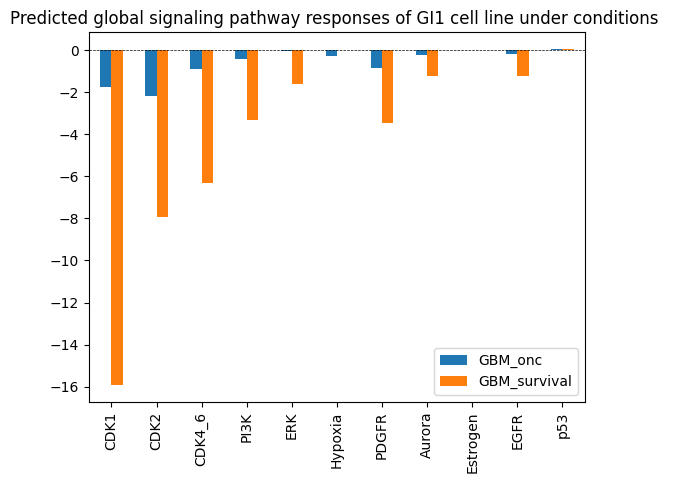

In [26]:
t_df_subset.plot.bar()
plt.axhline(y=0, linestyle='--', color='black',linewidth=0.5)
plt.title("Predicted global signaling pathway responses of GI1 cell line under conditions ")

In [27]:
rm_filt

,CDK1,CDK2,CDK4_6,PI3K,ERK,Hypoxia,PDGFR,Aurora,Estrogen,EGFR,p53,GBM_onc,GBM_survival
CDK1,-1.000000,0.327033,0.232437,0.116146,0.104551,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0
CDK2,0.380662,-1.000000,0.000000,0.000000,-0.128075,0.000000,0.098630,0.000000,0.00000,0.000000,0.000000,0.0,0.0
CDK4_6,0.504204,0.000000,-1.000000,0.188599,0.000000,0.000000,0.230537,0.000000,0.00000,0.141086,-0.063524,0.0,0.0
PI3K,0.000000,0.515489,0.266876,-1.000000,0.178956,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0
ERK,0.312318,0.000000,0.000000,0.196511,-1.000000,0.000000,0.292170,0.319759,0.00000,0.000000,0.163526,0.0,0.0
Hypoxia,0.000000,0.000000,0.000000,0.176867,0.000000,-1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0
PDGFR,0.000000,0.294552,0.365561,0.000000,0.000000,0.000000,-1.000000,0.202688,0.00000,0.000000,0.000000,0.0,0.0
Aurora,0.000000,0.000000,0.000000,0.000000,0.245834,0.000000,0.293755,-1.000000,0.00000,0.227789,0.000000,0.0,0.0
Estrogen,-0.247607,0.000000,0.000000,0.000000,0.000000,0.000000,0.231143,0.000000,-1.00000,0.000000,0.090608,0.0,0.0
EGFR,0.000000,0.000000,0.364539,0.000000,0.000000,0.000000,0.347431,0.000000,0.00000,-1.000000,0.000000,0.0,0.0


In [28]:
display(rm_filt)
rm_subset=rm_filt[['CDK1', 'CDK2', 'CDK4_6', 'PI3K', 'ERK', 'Hypoxia', 'PDGFR', 'Aurora','Estrogen', 'EGFR', 'p53']]

,CDK1,CDK2,CDK4_6,PI3K,ERK,Hypoxia,PDGFR,Aurora,Estrogen,EGFR,p53,GBM_onc,GBM_survival
CDK1,-1.000000,0.327033,0.232437,0.116146,0.104551,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0
CDK2,0.380662,-1.000000,0.000000,0.000000,-0.128075,0.000000,0.098630,0.000000,0.00000,0.000000,0.000000,0.0,0.0
CDK4_6,0.504204,0.000000,-1.000000,0.188599,0.000000,0.000000,0.230537,0.000000,0.00000,0.141086,-0.063524,0.0,0.0
PI3K,0.000000,0.515489,0.266876,-1.000000,0.178956,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0
ERK,0.312318,0.000000,0.000000,0.196511,-1.000000,0.000000,0.292170,0.319759,0.00000,0.000000,0.163526,0.0,0.0
Hypoxia,0.000000,0.000000,0.000000,0.176867,0.000000,-1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0
PDGFR,0.000000,0.294552,0.365561,0.000000,0.000000,0.000000,-1.000000,0.202688,0.00000,0.000000,0.000000,0.0,0.0
Aurora,0.000000,0.000000,0.000000,0.000000,0.245834,0.000000,0.293755,-1.000000,0.00000,0.227789,0.000000,0.0,0.0
Estrogen,-0.247607,0.000000,0.000000,0.000000,0.000000,0.000000,0.231143,0.000000,-1.00000,0.000000,0.090608,0.0,0.0
EGFR,0.000000,0.000000,0.364539,0.000000,0.000000,0.000000,0.347431,0.000000,0.00000,-1.000000,0.000000,0.0,0.0


In [29]:
rm_subset

,CDK1,CDK2,CDK4_6,PI3K,ERK,Hypoxia,PDGFR,Aurora,Estrogen,EGFR,p53
CDK1,-1.000000,0.327033,0.232437,0.116146,0.104551,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
CDK2,0.380662,-1.000000,0.000000,0.000000,-0.128075,0.000000,0.098630,0.000000,0.00000,0.000000,0.000000
CDK4_6,0.504204,0.000000,-1.000000,0.188599,0.000000,0.000000,0.230537,0.000000,0.00000,0.141086,-0.063524
PI3K,0.000000,0.515489,0.266876,-1.000000,0.178956,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
ERK,0.312318,0.000000,0.000000,0.196511,-1.000000,0.000000,0.292170,0.319759,0.00000,0.000000,0.163526
Hypoxia,0.000000,0.000000,0.000000,0.176867,0.000000,-1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
PDGFR,0.000000,0.294552,0.365561,0.000000,0.000000,0.000000,-1.000000,0.202688,0.00000,0.000000,0.000000
Aurora,0.000000,0.000000,0.000000,0.000000,0.245834,0.000000,0.293755,-1.000000,0.00000,0.227789,0.000000
Estrogen,-0.247607,0.000000,0.000000,0.000000,0.000000,0.000000,0.231143,0.000000,-1.00000,0.000000,0.090608
EGFR,0.000000,0.000000,0.364539,0.000000,0.000000,0.000000,0.347431,0.000000,0.00000,-1.000000,0.000000


In [30]:
rm_subset=rm_subset.loc[['GBM_onc','GBM_survival']]
rm_subset=rm_subset.T
display(rm_subset)

,GBM_onc,GBM_survival
CDK1,-0.440956,-9.194019
CDK2,-1.158509,0.000000
CDK4_6,0.000000,0.000000
PI3K,0.000000,0.000000
ERK,0.000000,0.000000
Hypoxia,-0.285775,0.000000
PDGFR,-0.287405,0.000000
Aurora,0.000000,0.000000
Estrogen,0.000000,0.000000
EGFR,0.000000,0.000000


Text(0.5, 1.0, 'Predicted local signaling pathway responses of GI1 cell line under conditions ')

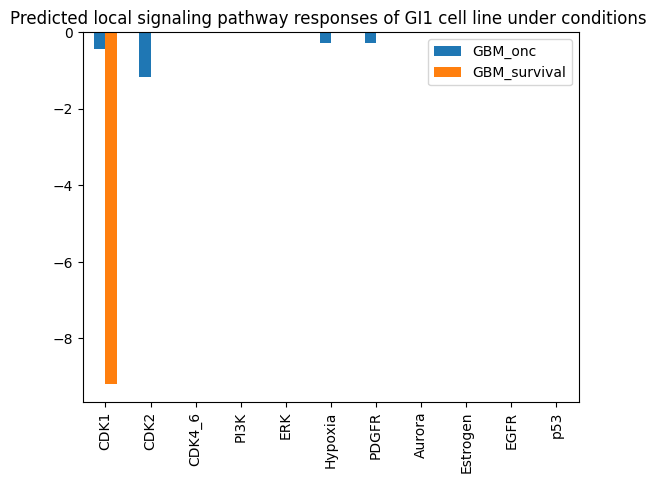

In [31]:
rm_subset.plot.bar()
plt.axhline(y=0, linestyle='--', color='black',linewidth=0.5)
plt.title("Predicted local signaling pathway responses of GI1 cell line under conditions ")